# Data mining and visualization project using meteorite data

15-04-2019

## Importing modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Importing data

In [2]:
df = pd.read_csv(r'C:\Users\Lukas\Meteor-data-visualization\Meteorite_Data.csv')

## Data cleaning

In [3]:
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


In [4]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


##### Generating a mass variable that is in kilograms instead of grams

In [5]:
df['masskg'] = df['mass'] / 1000

##### Splitting the GeoLocation into two separate variables

In [6]:
df[['Latitude','Longtitude']] = df.GeoLocation.str.split(" ",expand=True,)

##### Removing parentheses and commas from Latitude and Longtitude

In [7]:
df['Latitude'] = df['Latitude'].str.replace(r'(', '').str.strip()
df['Latitude'] = df['Latitude'].str.replace(r',', '').str.strip()
df['Longtitude'] = df['Longtitude'].str.replace(r')', '').str.strip()

##### Dropping unneeded columns

In [8]:
df = df.drop(['id', 'name', 'nametype', 'recclass', 'GeoLocation', 'reclat', 'reclong', 'mass'], axis=1)

##### Drop rows with missing values

In [9]:
df.count()

fall          45716
year          45428
masskg        45585
Latitude      38401
Longtitude    38401
dtype: int64

In [10]:
df = df[pd.notnull(df['Latitude'])]
df = df[pd.notnull(df['Longtitude'])]
df = df[pd.notnull(df['fall'])]
df = df[pd.notnull(df['masskg'])]
df = df[pd.notnull(df['year'])]

In [11]:
df.count()

fall          38116
year          38116
masskg        38116
Latitude      38116
Longtitude    38116
dtype: int64

##### Remove incorrect years and locations as instructed by data set provider

In [12]:
df = df.drop(df[df.year < 861].index)
df = df.drop(df[df.year > 2016].index)
df = df.drop(df[df.masskg <= 0.00001].index)

##### Splitting the dataset into categories of meteors that were seen vs that were found

Meteors that were seen

In [13]:
df.loc[df['fall'] == 'Fell', :].count()

fall          1064
year          1064
masskg        1064
Latitude      1064
Longtitude    1064
dtype: int64

Meteors that were found

In [14]:
df.loc[df['fall'] == 'Found', :].count()

fall          37029
year          37029
masskg        37029
Latitude      37029
Longtitude    37029
dtype: int64

Splitting the dataset

In [15]:
df_fell = df.loc[df['fall'] == 'Fell', :]
df_found = df.loc[df['fall'] == 'Found', :]

##### Current data table

In [16]:
df.head(3)

,fall,year,masskg,Latitude,Longtitude
0,Fell,1880.0,0.021,50.775000,6.083330
1,Fell,1951.0,0.720,56.183330,10.233330
2,Fell,1952.0,107.000,54.216670,-113.000000


In [17]:
df['year'].describe()

count    38093.000000
mean      1990.012758
std         24.800981
min       1399.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2013.000000
Name: year, dtype: float64

In [18]:
df['masskg'].describe()

count    38093.000000
mean        15.609702
std        628.863155
min          0.000013
25%          0.006670
50%          0.029100
75%          0.187700
max      60000.000000
Name: masskg, dtype: float64

## Visual data exploration

##### Amount of meteor sighting by year

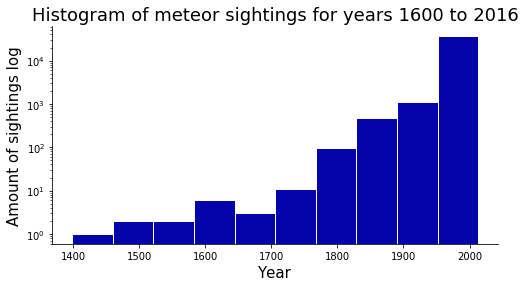

In [19]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Histogram of years 1600 to 2016
plt.hist(df.year, log=True, color='#0504aa', edgecolor='white')

# Setting axis titles
plt.title("Histogram of meteor sightings for years 1600 to 2016", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Amount of sightings log", fontsize=15)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Amount of sightings by year (hist).png', dpi=600)

It is interesting that the observation rate grew exponentially but uniformly, even though no modern technology was present for hundreds of years prior.

##### Meteor size distribution

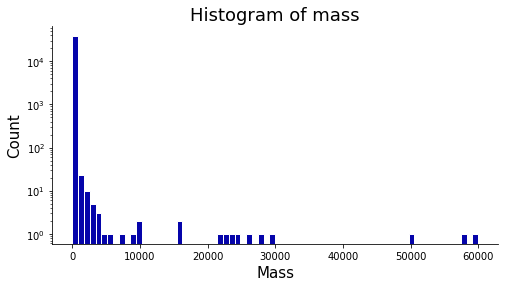

In [20]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Plotting histogram of mass
plt.hist(df.masskg, bins=70, log=True, color='#0504aa', edgecolor='white')

# Setting axis titles
plt.title("Histogram of mass", fontsize=18)
plt.xlabel("Mass", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Amount of sightings by year (hist).png', dpi=600)

Zooming in:

(0, 10000)

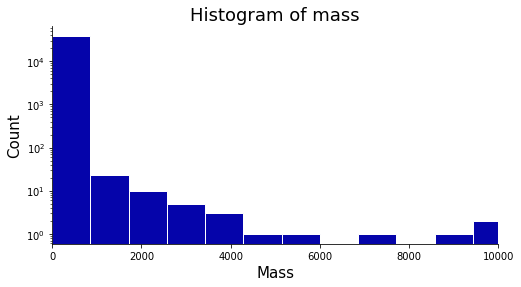

In [21]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Plotting histogram of mass
plt.hist(df.masskg, bins=70, log=True, color='#0504aa', edgecolor='white')

# Setting axis titles
plt.title("Histogram of mass", fontsize=18)
plt.xlabel("Mass", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting axis limits
plt.xlim([0, 10000])

# Saving the figure
# plt.savefig('Amount of sightings by year (hist).png', dpi=600)

*** ff

##### Meteor size by year

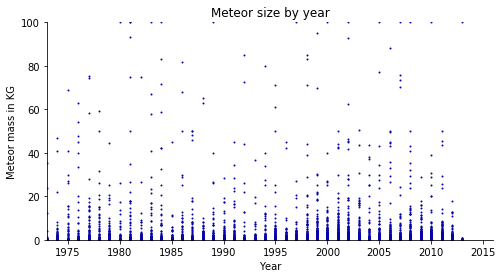

In [22]:
# Setting figure size
a = plt.figure(figsize=(8, 4))

# Plotting a scatter plot
plt.scatter(df.year, df.masskg, color='#0504aa', s=1) 

# Setting axis titles
plt.title("Meteor size by year")
plt.xlabel("Year")
plt.ylabel("Meteor mass in KG")

# Setting axis limits
plt.xlim(1973, 2016)
plt.ylim(0, 100)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

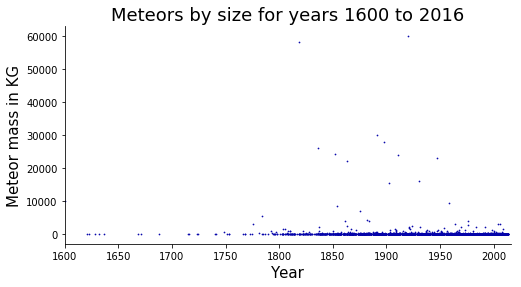

In [23]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Transforming mass (log)
log_mass = np.log(df['masskg'])

# Creating a scatter plot
plt.scatter(df.year, df.masskg, color='#0504aa', s=0.5)

# Setting axis titles
plt.title("Meteors by size for years 1600 to 2016", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Meteor mass in KG", fontsize=15)

# Setting axis limits
plt.xlim([1600, 2016])
plt.ylim=([0, 100])

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

Let's normalize the mass using log, to try and spot any patterns

TypeError: 'tuple' object is not callable

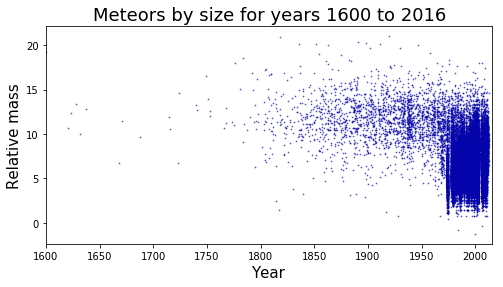

In [53]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Transforming mass (log)
log_mass = np.log(df['masskg']) + 10

# Creating a scatter plot
plt.scatter(df.year, log_mass, color='#0504aa', s=0.5, alpha=0.6)

# Setting axis titles
plt.title("Meteors by size for years 1600 to 2016", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Relative mass", fontsize=15)

# Setting axis limits
plt.xlim([1600, 2016])
plt.ylim(0, 10)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

Sharp increase in recorded observations in a very short period of time. We can 'zoom' in on that portion of the data.

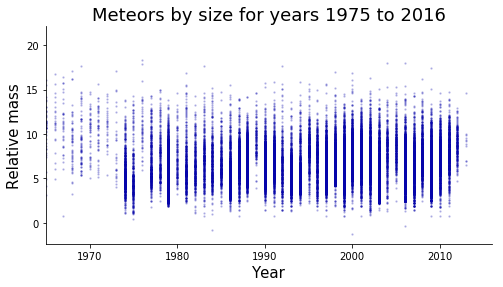

In [25]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Creating a scatter plot
plt.scatter(df.year, log_mass, color='#0504aa', s=2, alpha=0.2)

# Adjusting axies labels
plt.xlabel('Year', fontsize=15)
plt.ylabel('Relative mass', fontsize=15)
plt.title('Meteors by size for years 1975 to 2016', fontsize=18)

# Setting axis limits
plt.xlim(1965, 2016)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

Apparantly, something happenned in year 1974 that caused a sharp increase in observation amount, and started a whole new trend of observation amount, that continues up until the very latest year.

## Create a blue marble vizualization using geographical coordinates

In [26]:
# Converting 'str' pandas dataframe into float numpy array
lat = df['Latitude'].values
lon = df['Longtitude'].values
mass = df['masskg'].values

lat = lat.astype(np.float)
lon = lon.astype(np.float)
mass = mass.astype(np.float)

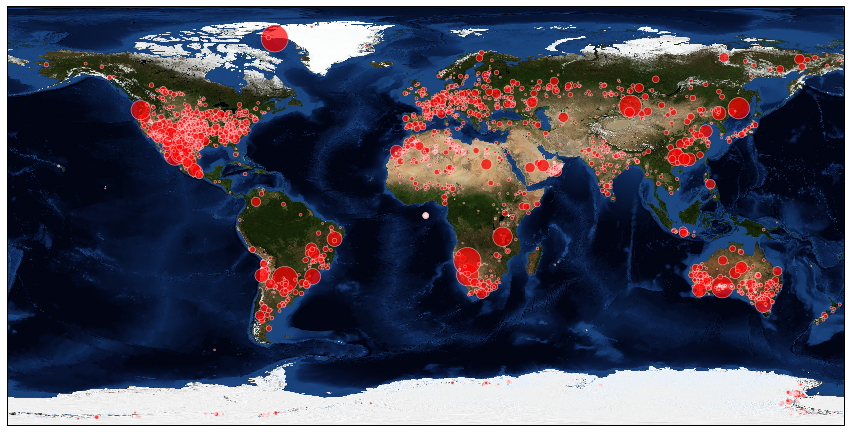

In [40]:
# Setting figure size
plt.figure(figsize=(15, 15))

# Creating a projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Set background image (Check https://visibleearth.nasa.gov/collection/1484/blue-marble for more background images)
# ax.stock_img()  # Setting background to stock image

# Removing image size limits
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
# Setting up the environment directory
import os  # Kernel needs to be reset if changes to image.json are made
os.environ["CARTOPY_USER_BACKGROUNDS"] = r'C:\Users\Lukas\OneDrive\Projects\WB\Articles\Data Analysis\Geographical data\Meteor_data_visualization-master\cartopy_metadata'
# Setting the image as a background
ax.background_img(name='BM', resolution='low')

# Removing everything but the scatter plot
plt.axis('off')

# Normalizing mass with square root, to correlate with marker size
df['sqrt_mass'] = df['masskg']**(1/2)

# Creating a scatter plot
plt.scatter(lon, lat, s=df.sqrt_mass*12, alpha=0.7, 
              marker='.', color='red', edgecolors='white', linewidths=0.5,
                transform=ccrs.PlateCarree())

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

*** We can see where the biggest meteors struck (that were found and/or observed)

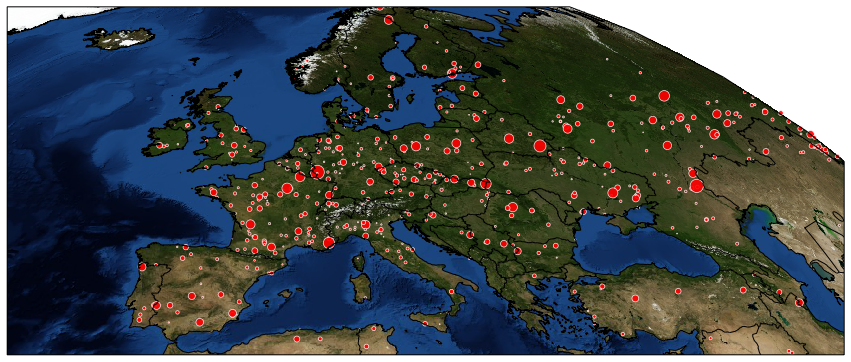

In [50]:
# Setting figure size
plt.figure(figsize=(15, 15))

# Creating a projection
ax = plt.axes(projection=ccrs.Orthographic())

# Selecting coordinates of the area (https://www.openstreetmap.org/export)
# Latitude is height
lat_min = 35
lat_max = 70
lon_min = -18
lon_max = 50
# Zooming in on a specified area
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Setting the image as a background
ax.background_img(name='BM', resolution='low')

# Removing everything but the scatter plot
plt.axis('off')

# Creating country borders
ax.add_feature(cfeature.BORDERS.with_scale('10m'))
# Creating coastline borders
ax.coastlines(resolution='10m')

# Creating a scatter plot
plt.scatter(lon, lat, s=df.sqrt_mass*20, alpha=0.9, 
              marker='.', color='red', edgecolors='white', linewidths=0.7,
                transform=ccrs.PlateCarree())

# Saving the figure
# plt.savefig('Mass vs Year.png', dpi=600)

##### Creating a skeleton scatter plot

And here is our world drawn by our own observations of meteors.

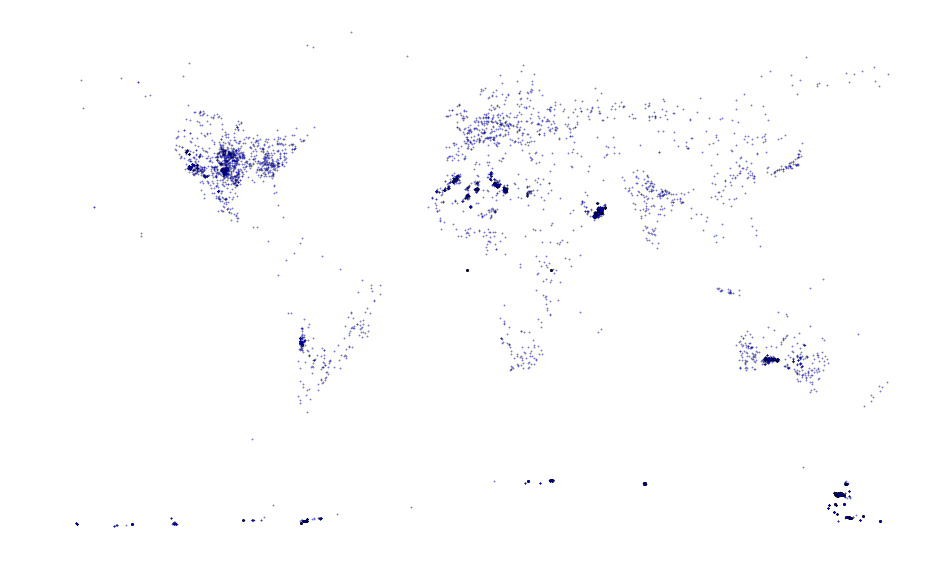

In [29]:
# Setting figure size
plt.figure(figsize=(16, 10))

# Removing everything but the scatter plot
plt.axis('off')

# Creating a scatter plot
plt.scatter(lon, lat, color='blue', s=2,
             alpha=0.5, edgecolor='black', linewidth=0.3)

# Saving the figure
# plt.savefig('Impact skeleton map.png', dpi=600)

W